In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.sans-serif"]=["SimHei"] 
plt.rcParams["axes.unicode_minus"]=False   
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('winequality-white.csv',sep=';')    #导入数据

In [3]:
df.head()     #观察白酒数据

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.info()     #观察白酒数据

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
from sklearn.preprocessing import scale      #对数据进行标准化处理
df_scaled = scale(df)
df_scaled

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01, ...,
        -3.49184257e-01, -1.39315246e+00,  1.37870140e-01],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02, ...,
         1.34184656e-03, -8.24275678e-01,  1.37870140e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01, ...,
        -4.36815783e-01, -3.36667007e-01,  1.37870140e-01],
       ...,
       [-4.20473102e-01, -3.79435433e-01, -1.19159198e+00, ...,
        -2.61552731e-01, -9.05543789e-01,  1.37870140e-01],
       [-1.60561323e+00,  1.16673788e-01, -2.82557040e-01, ...,
        -9.62604939e-01,  1.85757201e+00,  1.26711420e+00],
       [-1.01304317e+00, -6.77100966e-01,  3.78559282e-01, ...,
        -1.48839409e+00,  1.04489089e+00,  1.37870140e-01]])

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text xticklabel objects>)

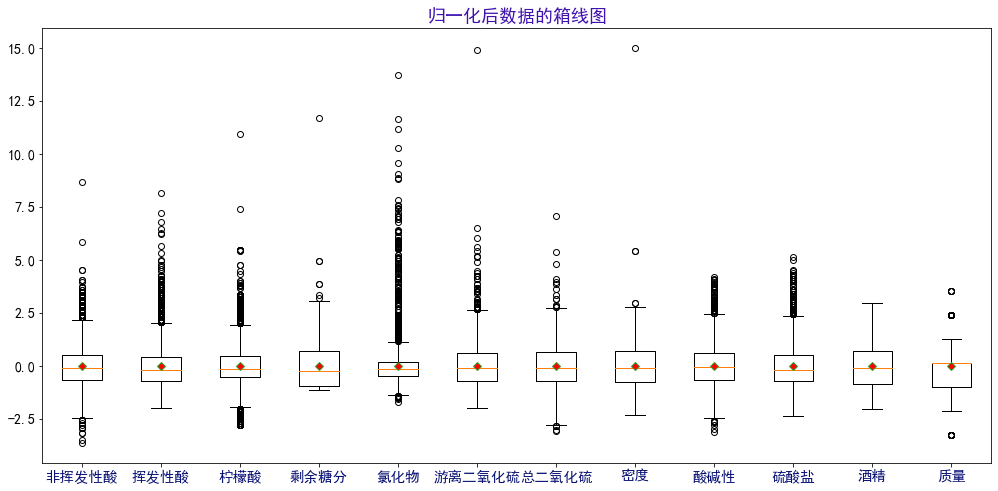

In [6]:
plt.figure(figsize=(17,8))       #数据进行归一化
columns = ["非挥发性酸","挥发性酸","柠檬酸","剩余糖分","氯化物","游离二氧化硫","总二氧化硫",
            "密度","酸碱性","硫酸盐","酒精","质量"]
plt.boxplot(df_scaled,
            showmeans=True,meanprops={"marker":"D","markerfacecolor":"red"},#设置均值点的属性，点的形状、填充色 
            labels=columns
            )
plt.title("归一化后数据的箱线图",color="#4013AF",size=18)
plt.yticks(fontsize=14,color="k")
plt.xticks(fontsize=14.5,color="#081073")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CEFF8F51C8>,
      dtype=object)

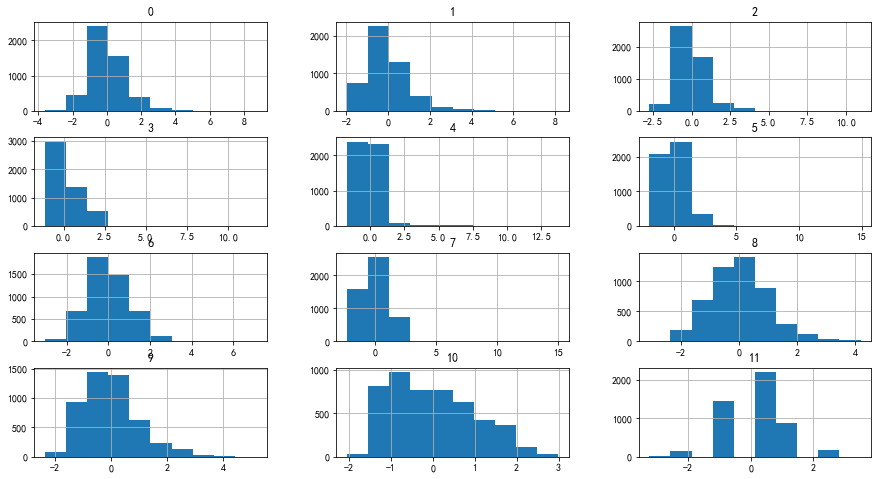

In [7]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.hist(figsize=(15,8))

In [8]:
df_scaled.skew().sort_values(ascending=False)

4     5.023331
1     1.576980
5     1.406745
2     1.281920
3     1.077094
7     0.977773
9     0.977194
0     0.647751
10    0.487342
8     0.457783
6     0.390710
11    0.155796
dtype: float64

In [9]:
df_scaled.kurt().sort_values(ascending=False)

4     37.564600
5     11.466342
7      9.793807
2      6.174901
1      5.091626
3      3.469820
0      2.172178
9      1.590930
6      0.571853
8      0.530775
11     0.216526
10    -0.698425
dtype: float64

In [10]:
(df_scaled.max()-df_scaled.min()).sort_values(ascending=False)

7     17.344336
5     16.876991
4     15.426350
2     13.718164
3     12.856056
0     12.325457
6     10.142674
1     10.120628
9      7.536311
8      7.285483
11     6.775464
10     5.038623
dtype: float64

In [11]:
df_df_scaled = pd.DataFrame(df_scaled)
df_df_scaled.columns = columns
df_df_scaled.sample(9)  #分析白酒质量与各个特征之间的关系,随机抽取10个归一化后的样本数据

,非挥发性酸,挥发性酸,柠檬酸,剩余糖分,氯化物,游离二氧化硫,总二氧化硫,密度,酸碱性,硫酸盐,酒精,质量
3746,0.646153,-0.081770,-0.447836,-0.905330,-0.264233,0.569932,-0.408546,-1.202894,-1.114458,-0.787342,1.126159,-0.991374
3844,-0.183445,0.910449,-0.695755,-0.767304,-0.813539,-0.664970,-1.279263,-1.045735,-0.319678,-1.137868,0.963623,0.137870
1177,-0.064931,-0.280214,-0.365197,-0.865894,-0.172682,-0.958994,1.191690,0.392103,1.799735,0.439499,-0.255399,0.137870
2959,0.527639,1.208114,-0.613115,-0.185627,-1.362845,-0.547361,-1.138066,-1.510524,-2.306628,0.439499,2.182644,1.267114
1118,-1.250071,1.356947,-1.687429,-0.984201,-0.264233,-1.429433,-1.749921,-0.611040,0.673797,0.264236,-0.011595,-0.991374
4263,0.172097,2.696442,-2.348546,0.317179,-0.447335,-0.958994,0.603368,-0.447193,0.475102,-0.261553,1.369963,0.137870
282,-0.064931,1.605001,0.295920,-0.254640,0.056196,0.628736,1.474084,-0.076030,-0.717068,1.403446,-0.011595,-2.120618
3944,-0.894529,-0.081770,-0.117278,-0.037743,0.101972,0.687541,0.532769,-0.407067,0.210175,0.965289,0.394746,0.137870
682,-1.131557,-0.280214,-0.695755,0.967869,0.285074,-0.312141,0.626901,0.993988,0.342639,-0.436816,-0.824276,0.137870


In [12]:
corr_df = df_df_scaled.corr()
corr_df

,非挥发性酸,挥发性酸,柠檬酸,剩余糖分,氯化物,游离二氧化硫,总二氧化硫,密度,酸碱性,硫酸盐,酒精,质量
非挥发性酸,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
挥发性酸,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
柠檬酸,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
剩余糖分,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
氯化物,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
游离二氧化硫,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
总二氧化硫,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
密度,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
酸碱性,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
硫酸盐,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [13]:
corr_df["质量"].sort_values(ascending=False)

质量        1.000000
酒精        0.435575
酸碱性       0.099427
硫酸盐       0.053678
游离二氧化硫    0.008158
柠檬酸      -0.009209
剩余糖分     -0.097577
非挥发性酸    -0.113663
总二氧化硫    -0.174737
挥发性酸     -0.194723
氯化物      -0.209934
密度       -0.307123
Name: 质量, dtype: float64

Text(0.5, 1, '各特征间的热力图')

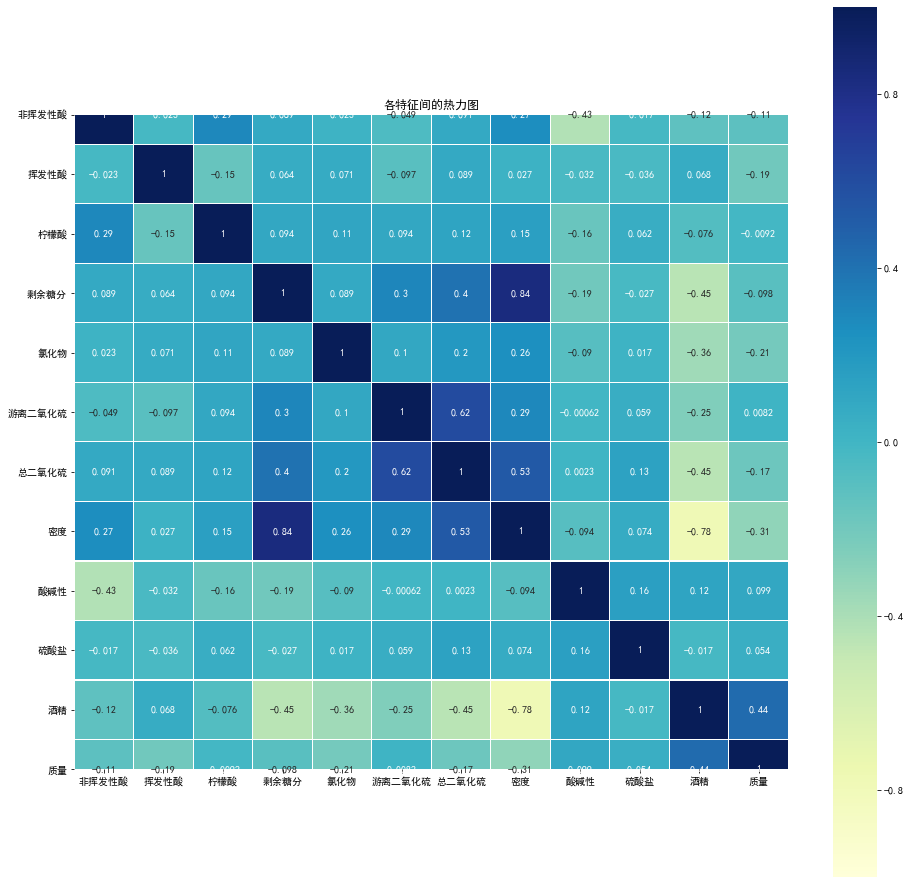

In [14]:
plt.figure(figsize=(16,16))
sns.heatmap(corr_df,linewidths=0.1,square=True,linecolor="white",annot=True,cmap='YlGnBu',vmin=-1,vmax=1)
plt.title("各特征间的热力图")

#可以发现，白酒的质量评分与酒精、酸碱性、硫酸盐、游离二氧化硫有正的线性相关关系，它们的含量越高，口感评分越高；而与其他特征都呈现负的线性相关关系，这些特征的含量越高，口感评分越低。关系强度最大为0.44，大部分关系强度的绝对值均小于0.2（线性关系强度在[0,1]之间）

In [15]:
x = df_df_scaled.iloc[:,:11]     #对所有数据做交叉验证
y = df_df_scaled.iloc[:,-1]
print("特征集：",x.shape)
print("标签集：",y.shape)
from sklearn.linear_model import LassoCV
Las_cv = LassoCV(cv=10).fit(x,y)

特征集： (4898, 11)
标签集： (4898,)


In [16]:
print("线性模型的截距：",Las_cv.intercept_)
print("线性模型的回归系数：\n",Las_cv.coef_)

线性模型的截距： 1.0664615673946131e-14
线性模型的回归系数：
 [ 0.0098704  -0.21381849  0.          0.33369253 -0.01166061  0.06691956
 -0.009035   -0.31407498  0.07341963  0.06597724  0.352643  ]


In [17]:
Coef2_df = pd.DataFrame(Las_cv.coef_,index=columns[0:11],columns=["回归系数"])
Coef2_df.sort_values(by="回归系数",ascending=False)

,回归系数
酒精,0.352643
剩余糖分,0.333693
酸碱性,0.073420
游离二氧化硫,0.066920
硫酸盐,0.065977
非挥发性酸,0.009870
柠檬酸,0.000000
总二氧化硫,-0.009035
氯化物,-0.011661
挥发性酸,-0.213818


Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

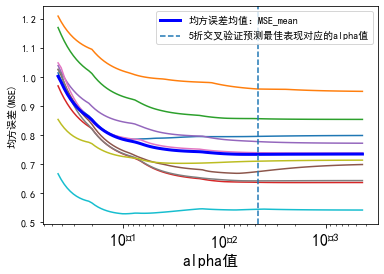

In [18]:
plt.figure(figsize=(6,4))      #5折交叉验证
plt.plot(Las_cv.alphas_,Las_cv.mse_path_,"-")
plt.plot(Las_cv.alphas_,Las_cv.mse_path_.mean(axis=-1),label="均方误差均值：MSE_mean",linewidth=3,color="b")
plt.axvline(Las_cv.alpha_,linestyle="--",label="5折交叉验证预测最佳表现对应的alpha值")
plt.xlabel("alpha值",size=16)
plt.xticks(size=16)
plt.ylabel("均方误差(MSE)")
plt.legend(loc="best")
plt.semilogx()
ax = plt.gca()
ax.invert_xaxis()

In [19]:
print("5折交叉验证中，最小的MSE（均值）：", min(Las_cv.mse_path_.mean(axis=0)))

5折交叉验证中，最小的MSE（均值）： 0.5475755879508456


5折交叉验证里，最小的MSE为0.548,5折的平均值见最粗的蓝色线，在0.74—0.75之间

总的结论：（1）各特征间存在一定的线性关系，但普遍关系强度不太大；最大的是密度与剩余糖分、酒精浓度的线性关系。
    （2）找出对白酒质量影响最大的前三因素：酒精、剩余糖分、密度。